In [1]:
import itertools
import os

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from torchvision import transforms


In [2]:
# Convert images to tensors and add labels

real_cats_dir = "cat_aesthetic"
generated_cats_dir = "cat_generated_aesthetic"
convert_tensor = transforms.ToTensor()


def get_images(dir, label, n=0):
    images = []
    i = 0
    for filename in os.listdir(dir):
        f = os.path.join(dir, filename)
        if os.path.isfile(f):
            img = Image.open(f)
            images.append((convert_tensor(img), label))
            i += 1
            if n and i >= n:
                return images
    return images


# label 0 indicates real image
real_images = get_images(real_cats_dir, 0, n=500)
# label 1 indicates AI image
generated_images = get_images(generated_cats_dir, 1, n=500)

In [3]:
X = np.array([x.numpy().flatten() for (x, y) in itertools.chain(real_images, generated_images)])
y = np.array([y for (x, y) in itertools.chain(real_images, generated_images)])
print(X.shape)
print(y.shape)

(1000, 196608)
(1000,)


In [4]:
from sklearn.decomposition import PCA

pca = PCA(2)
projected = pca.fit_transform(X)
print(projected.shape)

(1000, 2)


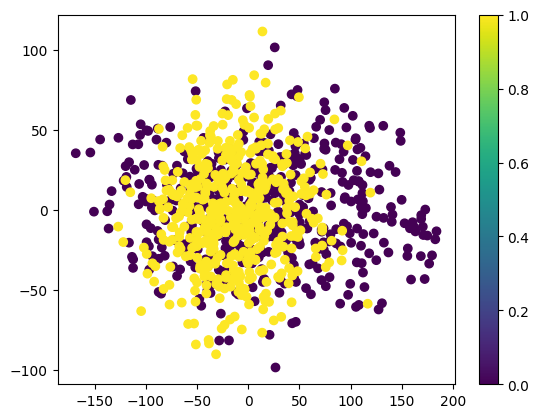

In [5]:
plt.scatter(projected[:, 0], projected[:, 1], c=y)
plt.colorbar()